# Object Detection(Car Detection)




### DOMAIN: 
Automotive , Surveillance
### CONTEXT: 
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is 
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of 
the car, type, colour, number plates etc
### DATA DESCRIPTION: 
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing 
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 
2012 Tesla Model S or 2012 BMW M3 coupe
‣ Train Images: Consists of real images of cars as per the make and year of the car. 
‣ Test Images: Consists of real images of cars as per the make and year of the car.
‣ Train Annotation: Consists of bounding box region for training images.
‣ Test Annotation: Consists of bounding box region for testing images.
Dataset has been attached along with this project. Please use the same for this capstone project
Dataset: Original dataset link for your reference only: https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder
### REFERENCE: 
3D Object Representations for Fine-Grained Categorisation, Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei 4th IEEE 
Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.
### PROJECT OBJECTIVE: 
Design a DL based car identification model

In [ ]:
%tensorflow_version 2.x
#%tensorflow_version 1.x

In [ ]:
# Lets check version of tensor flow and keras installed 

import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
import keras
print(keras.__version__)

2.8.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the above versions libraries are required for the Third party implementation we are goin to use

## Legend

 ### Insights/inferences/results have been displayed post each step

In [ ]:
# Lets check if we are connected to GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


## 1.0 Import & EDA on TRAIN data

### 1.1 Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(0)

#Additional libs
import matplotlib.patches as patches


In [ ]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

### 1.2 Read Data & View original Data

In [ ]:
# Read The Data Set


images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"

#Lets note here that our images are structred as folders.Each folder is a cart type
#Corresponding folder will contain images of THAT car  type
#We have a seperate folder for Train and Test IMages

In [ ]:
#We will first work with TRAIN DATA

#First we will loop over train data 
# We will cross verify no of labels/classes/cars matches that in data description given to us
# We will cross verfiy that total no of images matches that in data description given to us
# We will print just one or two sample images randomly with their  size to get an idea

import os

#path, subdirs, files = os.walk(images_path+'Train Images')


all_folders_train= os.listdir(images_path+'Train Images')
print("Lets display some stats on TRAIN data \n")
print("No of labels ",len(all_folders_train))
print("List of labels")
print(all_folders_train,'\n')


Lets display some stats on TRAIN data 

No of labels  196
List of labels
['Suzuki SX4 Sedan 2012', 'Spyker C8 Coupe 2009', 'Rolls-Royce Phantom Drophead Coupe Convertible 2012', 'smart fortwo Convertible 2012', 'MINI Cooper Roadster Convertible 2012', 'Volvo 240 Sedan 1993', 'Spyker C8 Convertible 2009', 'Suzuki SX4 Hatchback 2012', 'Scion xD Hatchback 2012', 'Volvo XC90 SUV 2007', 'Rolls-Royce Phantom Sedan 2012', 'Toyota 4Runner SUV 2012', 'Mercedes-Benz SL-Class Coupe 2009', 'Rolls-Royce Ghost Sedan 2012', 'Suzuki Aerio Sedan 2007', 'Volvo C30 Hatchback 2012', 'Lincoln Town Car Sedan 2011', 'Volkswagen Beetle Hatchback 2012', 'Volkswagen Golf Hatchback 1991', 'Tesla Model S Sedan 2012', 'Toyota Camry Sedan 2012', 'Ram C-V Cargo Van Minivan 2012', 'Toyota Corolla Sedan 2012', 'McLaren MP4-12C Coupe 2012', 'Lamborghini Diablo Coupe 2001', 'Volkswagen Golf Hatchback 2012', 'Jeep Patriot SUV 2012', 'Hyundai Sonata Hybrid Sedan 2012', 'GMC Savana Van 2012', 'GMC Acadia SUV 2012', 'Chevro

### 1.3 EDA

1.   Check some statistics on data



In [ ]:
trainCount=0
for i in all_folders_train:
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  trainCount=trainCount+len(eachFolder)


print("Lets do some EDA on data ",trainCount)

print("Total No Of Images ",trainCount)


#Empty list to store distribution of each label
distiList=[]
#Lets also store each corresponding label
labelList=[]
for i in all_folders_train:
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  #print("Label:",i)
  #print('Distribution',len(eachFolder)/trainCount*100 ,'\n')
  #Lets add all the distributions to a list 
  distiList.append(len(eachFolder))
  # Lets add labels to label list
  labelList.append(i)


Lets do some EDA on data  8144
Total No Of Images  8144


Lets display distribution of each class/label in TRAIN dataset



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

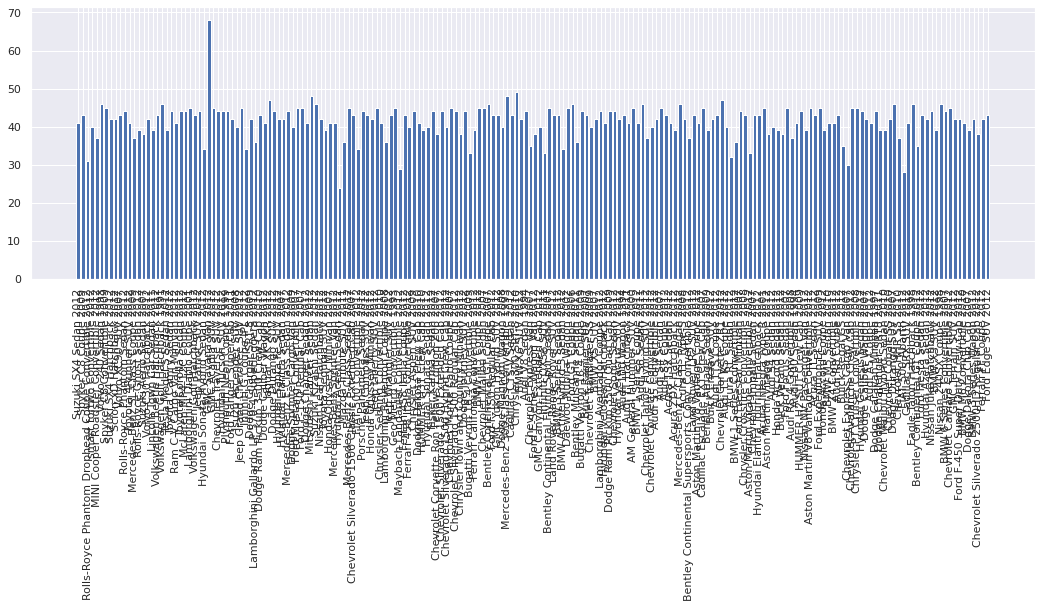

In [ ]:
# Lets display visually distributions

print("Lets display distribution of each class/label in TRAIN dataset\n")

f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation='vertical')
bar = plt.bar(labelList, distiList)

In [ ]:
# Lets print some stats on distribtuion
distiSeries=pd.Series(data=distiList)

print("Mean of distribbution",distiSeries.mean() )
print("Minimum of distribbution",distiSeries.min()) 
print("Maximum of distribbution",distiSeries.max() )

Mean of distribbution 41.55102040816327
Minimum of distribbution 24
Maximum of distribbution 68


In [ ]:
# Lets try to display two images with labels and bounding boxes

#Lets read the Train Annotations

#Lets give our own column names as excel sheet does not have proper column names
columnNameList=['Image_Name','cor1','cor2','cor3','cor4','Image_Class']
trainAnno= pd.read_csv('/content/drive/MyDrive/Capstone/Annotations/Train Annotations.csv',names=columnNameList)
trainAnno.head(5)

,Image_Name,cor1,cor2,cor3,cor4,Image_Class
0,Image Name,Bounding Box coordinates,NaN,NaN,NaN,Image class
1,00001.jpg,39,116.0000000,569.0000000,375.0000000,14
2,00002.jpg,36,116.0000000,868.0000000,587.0000000,3
3,00003.jpg,85,109.0000000,601.0000000,381.0000000,91
4,00004.jpg,621,393.0000000,1484.0000000,1096.0000000,134


In [ ]:
# Lets doa  small POC on how to access coordinates
# We will use this POC later in ur function to extract coordinates

labelData=trainAnno[trainAnno['Image_Name']=='00001.jpg']
labelData
#First coordinate
print('print coordinate',labelData['cor1'])

,Image_Name,cor1,cor2,cor3,cor4,Image_Class
1,00001.jpg,39,116.0000000,569.0000000,375.0000000,14


print coordinate 1    39
Name: cor1, dtype: object


In [ ]:
# We now need to check for spelling mistakes in the label
# First read all the names in the make file 

carMakeFile=pd.read_csv("/content/drive/MyDrive/Capstone/Car names and make.csv",names=['Make'])
carMakeFile.head(5)

,Make
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [ ]:
#Lets check for spelling mistake in the labels
#We will compare folder names with label names in annotation file
# First eliminate duplicates from the list, then sot and then compare

#First eliminate duplicates from folder labels 
temp_all_folders_train=[]
[temp_all_folders_train.append(x) for x in all_folders_train if x not in temp_all_folders_train]
# Easuer way of doig this , just convert the list to set

print("Length ",len(temp_all_folders_train))

#Next eliminate duplicates from annotation  labels 
temp_make_labels=[]
[temp_make_labels.append(x) for x in list(carMakeFile['Make']) if x not in temp_make_labels]

print("Length ",len(temp_make_labels))


#First sort both the lists
temp_all_folders_train.sort()
temp_make_labels.sort()

if(temp_all_folders_train==temp_make_labels):
  print("Equal")
else:
        print("Not Equal")

print("Extra Elements",set(temp_make_labels) - set(temp_all_folders_train))
print("Extra Elements",set(temp_all_folders_train) - set(temp_make_labels))


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Length  196


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Length  196
Not Equal
Extra Elements {'Ram C/V Cargo Van Minivan 2012'}
Extra Elements {'Ram C-V Cargo Van Minivan 2012'}


Size of image is (480, 640, 3)


Size of image is (469, 750, 3)


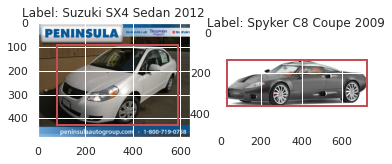

In [ ]:
# Lets display one or two sample images along with their BOUNDING BOX
#all_folders_train= os.listdir(images_path+'Train Images')
import matplotlib.image as img
import matplotlib.patches as patches


# Break Flag
breakFlgCount=0
plotCount=0

#This creates two subplots because you have mentioned 1 row 2 columns
# Each subplot can be accessed with ax[0]
#If you had 4 subplots it would be ax[i][j]
fig , ax = plt.subplots(1,2)

for i in all_folders_train:
  breakFlgCount=breakFlgCount + 1 
  if(breakFlgCount>2):
    break
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  for eachFile in eachFolder:
    # reading png image file
    im = img.imread(images_path+'Train Images/'+i+'/'+eachFile)
    # Getting coordinates
    labelData=trainAnno[trainAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])

    # Add Image
    ax[plotCount].imshow(im)
    #ax[plotCount].add_image(im)
    # Create a Rectangle patch
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax[plotCount].add_patch(rect)
    # Set tittle for each sublpot/ax
    ax[plotCount].title.set_text('Label: '+ i)
  
    plotCount=plotCount+1
    #plt.subplot(1,2,plotCount)
    #ax[plotCount].title("Label: "+i)
    #plt.imshow(im)
    #plt.set_title()

    print('Size of image is',im.shape)
    break

plt.show()


### 1.4 Inference/Summary

- Above we did a imported TRAIN data , had a look at how the data is organised
- We checked the train data sample size , the no of labels it has
- We did an EDA to check the distribution of each label
- We displayed two images randomly with their bounding boxes and labels.
- We also printed image sizes, all image sizes are not the same.
- There is one discrepency in the label name "Ram C/V Cargo Van Minivan 2012".It is spelt as 'Ram C/V Cargo Van Minivan 2012 in the make file but as 'Ram C-V Cargo Van Minivan 2012' in te folder structure



In [ ]:
# Blank Space

# Blank Space

## 2.0 Import & EDA on TEST data

### 2.1 Import necessary libraries
- Already done

### 2.2 Read Data & View original Data

In [ ]:
# Read The Data Set


images_path = "/content/drive/MyDrive/Capstone/Car Images/Car Images/"

#Lets note here that our images are structred as folders.Each folder is a cart type
#Corresponding folder will contain images of THAT car  type
#We have a seperate folder for Train and Test IMages

In [ ]:
#We will now work with TEST DATA

#First we will loop over test data 
# We will cross verify no of labels/classes/cars matches that in data description given to us
# We will cross verfiy that total no of images matches that in data description given to us
# We will print just one or two sample images randomly with their  size to get an idea

import os

#path, subdirs, files = os.walk(images_path+'Train Images')


all_folders_test= os.listdir(images_path+'Test Images')
print("Lets display some stats on TEST data \n")
print("No of labels ",len(all_folders_test))
print("List of labels")
print(all_folders_test,'\n')


Lets display some stats on TEST data 

No of labels  196
List of labels
['Volkswagen Golf Hatchback 1991', 'Volkswagen Golf Hatchback 2012', 'Nissan Leaf Hatchback 2012', 'Rolls-Royce Phantom Drophead Coupe Convertible 2012', 'Infiniti QX56 SUV 2011', 'Lamborghini Aventador Coupe 2012', 'HUMMER H3T Crew Cab 2010', 'Jeep Grand Cherokee SUV 2012', 'Hyundai Elantra Sedan 2007', 'Mitsubishi Lancer Sedan 2012', 'Toyota Camry Sedan 2012', 'Nissan NV Passenger Van 2012', 'Mazda Tribute SUV 2011', 'Lincoln Town Car Sedan 2011', 'Isuzu Ascender SUV 2008', 'HUMMER H2 SUT Crew Cab 2009', 'GMC Canyon Extended Cab 2012', 'Maybach Landaulet Convertible 2012', 'Rolls-Royce Phantom Sedan 2012', 'Tesla Model S Sedan 2012', 'Mercedes-Benz C-Class Sedan 2012', 'Jeep Liberty SUV 2012', 'Hyundai Elantra Touring Hatchback 2012', 'Honda Accord Coupe 2012', 'Hyundai Santa Fe SUV 2012', 'Rolls-Royce Ghost Sedan 2012', 'Lamborghini Reventon Coupe 2008', 'Hyundai Tucson SUV 2012', 'Toyota 4Runner SUV 2012', 'Spy

### 2.3 EDA

1.   Check some statistics on data



In [ ]:
testCount=0
for i in all_folders_train:
  eachFolder=os.listdir(images_path+'Test Images/'+i)
  testCount=testCount+len(eachFolder)


print("Lets do some EDA on data ",testCount)

print("Total No Of Images ",testCount)


#Empty list to store distribution of each label
distiList=[]
#Lets also store each corresponding label
labelList=[]
for i in all_folders_test:
  eachFolder=os.listdir(images_path+'Test Images/'+i)
  #print("Label:",i)
  #print('Distribution',len(eachFolder)/trainCount*100 ,'\n')
  #Lets add all the distributions to a list 
  distiList.append(len(eachFolder))
  # Lets add labels to label list
  labelList.append(i)


Lets do some EDA on data  8041
Total No Of Images  8041


In [ ]:
# Lets try to display two images with labels and bounding boxes

#Lets read the Train Annotations

#Lets give our own column names as excel sheet does not have proper column names
columnNameList=['Image_Name','cor1','cor2','cor3','cor4','Image_Class']
testAnno= pd.read_csv('/content/drive/MyDrive/Capstone/Annotations/Test Annotation.csv',names=columnNameList)
testAnno.head(5)

,Image_Name,cor1,cor2,cor3,cor4,Image_Class
0,Image Name,Bounding Box coordinates,NaN,NaN,NaN,Image class
1,00001.jpg,30,52.0000000,246.0000000,147.0000000,181
2,00002.jpg,100,19.0000000,576.0000000,203.0000000,103
3,00003.jpg,51,105.0000000,968.0000000,659.0000000,145
4,00004.jpg,67,84.0000000,581.0000000,407.0000000,187


In [ ]:
# Lets doa  small POC on how to access coordinates
# We will use this POC later in ur function to extract coordinates

labelData=testAnno[testAnno['Image_Name']=='00001.jpg']
labelData
#First coordinate
print('print coordinate',labelData['cor1'])

,Image_Name,cor1,cor2,cor3,cor4,Image_Class
1,00001.jpg,30,52.0000000,246.0000000,147.0000000,181


print coordinate 1    30
Name: cor1, dtype: object


In [ ]:
# We now need to check for spelling mistakes in the label
# First read all the names in the make file 

carMakeFile=pd.read_csv("/content/drive/MyDrive/Capstone/Car names and make.csv",names=['Make'])
carMakeFile.head(5)

,Make
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [ ]:
#Lets check for spelling mistake in the labels
#We will compare folder names with label names in annotation file
# First eliminate duplicates from the list, then sot and then compare

#First eliminate duplicates from folder labels 
temp_all_folders_test=[]
[temp_all_folders_train.append(x) for x in all_folders_train if x not in temp_all_folders_test]
# Easuer way of doig this , just convert the list to set

print("Length ",len(temp_all_folders_test))

#Next eliminate duplicates from annotation  labels 
temp_make_labels=[]
[temp_make_labels.append(x) for x in list(carMakeFile['Make']) if x not in temp_make_labels]

print("Length ",len(temp_make_labels))


#First sort both the lists
temp_all_folders_test.sort()
temp_make_labels.sort()

if(temp_all_folders_test==temp_make_labels):
  print("Equal")
else:
        print("Not Equal")

#print("Extra Elements",set(temp_make_labels) - set(temp_all_folders_test))
# There could be classes completely absent in TEST data so we will not print above 
print("Extra Elements",set(temp_all_folders_test) - set(temp_make_labels))


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Length  0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

Length  196
Not Equal
Extra Elements set()


Size of image is (450, 600, 3)


Size of image is (194, 259, 3)


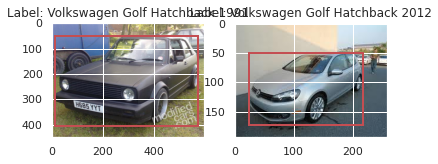

In [ ]:
# Lets display one or two sample images along with their BOUNDING BOX
#all_folders_train= os.listdir(images_path+'Train Images')
import matplotlib.image as img
import matplotlib.patches as patches


# Break Flag
breakFlgCount=0
plotCount=0

#This creates two subplots because you have mentioned 1 row 2 columns
# Each subplot can be accessed with ax[0]
#If you had 4 subplots it would be ax[i][j]
fig , ax = plt.subplots(1,2)

for i in all_folders_test:
  breakFlgCount=breakFlgCount + 1 
  if(breakFlgCount>2):
    break
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  for eachFile in eachFolder:
    # reading png image file
    im = img.imread(images_path+'Train Images/'+i+'/'+eachFile)
    # Getting coordinates
    labelData=trainAnno[trainAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])

    # Add Image
    ax[plotCount].imshow(im)
    #ax[plotCount].add_image(im)
    # Create a Rectangle patch
    rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax[plotCount].add_patch(rect)
    # Set tittle for each sublpot/ax
    ax[plotCount].title.set_text('Label: '+ i)
  
    plotCount=plotCount+1
    #plt.subplot(1,2,plotCount)
    #ax[plotCount].title("Label: "+i)
    #plt.imshow(im)
    #plt.set_title()

    print('Size of image is',im.shape)
    break

plt.show()


In [ ]:
# Blank Space

# Blank Space

### 2.4 Inference/Summary

- Above we did a imported TEST data , had a look at how the data is organised
- We checked the TEST data sample size , the no of labels it has
- We displayed two images randomly with their bounding boxes and labels.
- We also printed image sizes, all image sizes are not the same.
- No discrepancy in label names


## 3.0 Data Pre-processing Train Data
**Approach to the problem(NTS)** :
- The Primary Task is the to do Object Detection
- We have been given images of cars under folders(where folder name is label) and labels with bounding boxes as an exexcelcle sheet.
- We need to convert this data into a  suitable format for model building
- We will first format the images, resize if required and convert into a data frame
-We will then create the corresponding 'Y'(labels + bounding boxes) data frame for this

### 3.1 Prepare the Train data



In [ ]:
import matplotlib.image as img
import cv2

images_height=128
images_width=128
totalSamplesinTrain=8144

In [ ]:
# Create X_Train , Y_train 

#Lets initialise X_Train and Y_Train
X_Train=np.zeros([totalSamplesinTrain,images_height,images_width,3])
Y_Train=np.zeros([totalSamplesinTrain,5]) 

#Lets initialize a counter
counter=-1

for i in all_folders_train:
  eachFolder=os.listdir(images_path+'Train Images/'+i)
  for eachFile in eachFolder:
    if(eachFile.find('(') != -1):
      print("Duplicate File: ",eachFile)
      continue;
    
    #Proceed
    counter=counter+1

    # reading png image file
    im = img.imread(images_path+'Train Images/'+i+'/'+eachFile)
    imgLength=im.shape[0]
    imgWidth=im.shape[1]

    #Resizing image 
    resizedImage=cv2.resize(im, dsize=(images_height, images_width), interpolation=cv2.INTER_CUBIC)
    #Some These images had 4 channels , needed below line to convert to 3 
    convertedImage=cv2.cvtColor(resizedImage, cv2.COLOR_BGRA2BGR)
    im=convertedImage

    # Getting coordinates
    #print("Processing Files :",eachFile)
    labelData=trainAnno[trainAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])
    imageClass=labelData['Image_Class']

    # Resize Coordinates
    res_x0=int(x0*images_width/imgWidth)
    res_y0=int(y0*images_height/imgLength)
    res_x1=int(x1*images_width/imgWidth)
    res_y1=int(y1*images_height/imgLength)

    #Add to X_Train
    X_Train[counter]=im
    Y_Train[counter]=pd.Series(data=[res_x0,res_y0,res_x1,res_y1,imageClass])

#Print counter 
print("Total no of files ",counter)

Total no of files  8143


In [ ]:
#Perform some validations on Train data

X_Train.shape
Y_Train.shape


(8144, 128, 128, 3)

(8144, 5)

### 3.2 Pickle the Train data



In [ ]:
# Lets pickle/save prepared data

# NTS: to_pickle function not available , have to use save and in npy format 
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train.npy",X_Train)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train.npy",Y_Train)

### 3.3 Retrieve Pickled the Train data



In [ ]:
# Retrieve pickled data

X_Train = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train.npy")
Y_Train = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train.npy")

### 3.4 Quick Validation on Train data



In [ ]:
# Lets check shape 
X_Train.shape
Y_Train.shape

#Looks fine , lets proceed

(8144, 128, 128, 3)

(8144, 5)

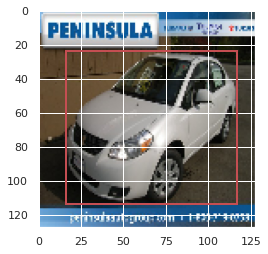

In [ ]:
# Lets visually display any two train data samples

# View any one sample of prepared Train Data 
im=X_Train[0]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im/255)
res_x0,res_y0,res_x1,res_y1,imageClass=Y_Train[0]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()
 

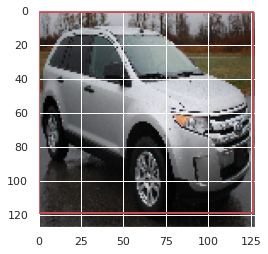

In [ ]:
# Lets visually display any two train data samples

# View any one sample of prepared Train Data 
im=X_Train[8143]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im/255)
res_x0,res_y0,res_x1,res_y1,imageClass=Y_Train[8143]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()
 

## 4.0 Data Pre-processing Test Data
**Approach to the problem(NTS)** :
- The Primary Task is the to do Object Detection
- We have been given images of cars under folders(where folder name is label) and labels with bounding boxes as an exexcelcle sheet.
- We need to convert this data into a  suitable format for model building
- We will first format the images, resize if required and convert into a data frame
-We will then create the corresponding 'Y'(labels + bounding boxes) data frame for this

### 4.1 Prepare the Test data



In [ ]:
import matplotlib.image as img
import cv2

images_height=128
images_width=128
totalSamplesinTest=8041

In [ ]:
# Create X_Test , Y_Test 

#Lets initialise X_Train and Y_Train
X_Test=np.zeros([totalSamplesinTest,images_height,images_width,3])
Y_Test=np.zeros([totalSamplesinTest,5]) 

#Lets initialize a counter
counter=-1

for i in all_folders_test:
  eachFolder=os.listdir(images_path+'Test Images/'+i)
  for eachFile in eachFolder:
    if(eachFile.find('(') != -1):
      print("Duplicate File: ",eachFile)
      continue;
    
    #Proceed
    counter=counter+1

    # reading png image file
    im = img.imread(images_path+'Test Images/'+i+'/'+eachFile)
    imgLength=im.shape[0]
    imgWidth=im.shape[1]

    #Resizing image 
    resizedImage=cv2.resize(im, dsize=(images_height, images_width), interpolation=cv2.INTER_CUBIC)
    #Some These images had 4 channels , needed below line to convert to 3 
    convertedImage=cv2.cvtColor(resizedImage, cv2.COLOR_BGRA2BGR)
    im=convertedImage

    # Getting coordinates
    #print("Processing Files :",eachFile)
    labelData=testAnno[testAnno['Image_Name']==eachFile]
    x0=int(labelData['cor1'])
    y0=int(labelData['cor2'])
    x1=int(labelData['cor3'])
    y1=int(labelData['cor4'])
    imageClass=labelData['Image_Class']

    # Resize Coordinates
    res_x0=int(x0*images_width/imgWidth)
    res_y0=int(y0*images_height/imgLength)
    res_x1=int(x1*images_width/imgWidth)
    res_y1=int(y1*images_height/imgLength)

    #Add to X_Train
    X_Test[counter]=im
    Y_Test[counter]=pd.Series(data=[res_x0,res_y0,res_x1,res_y1,imageClass])

#Print counter 
print("Total no of files ",counter)

Total no of files  8040


In [ ]:
#Perform some validations on Train data

X_Test.shape
Y_Test.shape


(8041, 128, 128, 3)

(8041, 5)

### 4.2 Pickle the Test data



In [ ]:
# Lets pickle/save prepared data

# NTS: to_pickle function not available , have to use save and in npy format 
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test.npy",X_Test)
np.save("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test.npy",Y_Test)

### 4.3 Retrieve Pickled the Test data



In [ ]:
# Retrieve pickled data

X_Test = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test.npy")
Y_Test = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test.npy")

### 4.4 Quick Validation on Test data



In [ ]:
# Lets check shape 
X_Test.shape
Y_Test.shape

#Looks fine , lets proceed

(8041, 128, 128, 3)

(8041, 5)

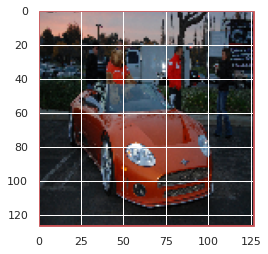

In [ ]:
# Lets visually display any two Test data samples

# View any one sample of prepared Test Data 
im=X_Test[8040]
# Show resized image with Box
fig,ax = plt.subplots(1)
ax.imshow(im/255)
res_x0,res_y0,res_x1,res_y1,imageClass=Y_Test[8040]
rect = patches.Rectangle((res_x0, res_y0), res_x1 - res_x0, res_y1 - res_y0, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()
 

In [ ]:
# Variable for model Building
images_height=128
images_width=128

## 5.0 Retrieve Pickled Data


In [ ]:
# Variables required for model Building

images_height=128
images_width=128

In [ ]:
# Retrieve pickled data

X_Train = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Train.npy")
Y_Train = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Train.npy")

In [ ]:
# Retrieve pickled data

X_Test = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/X_Test.npy")
Y_Test = np.load("/content/drive/MyDrive/Capstone/Pickled_Info/Y_Test.npy")